# US Census Data Case Study 

The objective of this case study is to determine whether an individual's income exceeds $50,000 per year based on various demographic and work-related features. 

This is a supervised binary classification problem with two outcome values: '>50K' and '<=50K', referring to income levels. 

Dataset used in this study: 
Kohavi, R. (1996). Census Income [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5GP7S.

Environment: 
Python 3.11.5;
Jupyter Notebook Platform

## Pipeline Details 

The following steps were completed for this case study: 
Part One: Exploratory Data Analysis
1. Loading Census Data
2. Data Preparation – missing values, converting to appropriate data types, encoding  target variable, displaying income distribution 
3. Analyzing Features & Target Variable – numerical feature histograms, categorical features charts, outliers in numerical data, correlation matrix analysis, bivariate analysis parallel coordinates plot, chi-square and t-test statistical analyses, feature importance with Random Forest 

Part Two: Biases Discussion 
1. Potential Biases 
2. Mitigating Biases 

Part Three: Predictive Modeling 
1. Data Preparation 
2. Logistic Regression & Feature Importance 
3. Random Forest Classifier & Feature Importance 
4. XGBoost & Feature Importance 
5. Support Vector Machine & Feature Importance 
6. Cross-Validation Tests 

Part Four: Overall Results

## Part One: Exploratory Data Analysis

In [2]:
# imports

import numpy as np 
import pandas as pd 
# data visualization related: 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid') # style for visualization

### Loading Census Data

In [4]:
# load data from dataset: https://archive.ics.uci.edu/dataset/20/census+income

data_path = '/Users/aliceliu/Desktop/census+income/adult.data'
test_path = '/Users/aliceliu/Desktop/census+income/adult.test'

# names of columns from the dataset 
col_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 
    'marital-status', 'occupation', 'relationship', 'race', 'sex', 
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# reading data (for training)

df = pd.read_csv(data_path, header=None, names=col_names, skipinitialspace=True)

# print the first five rows
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [5]:
# load test data
df_test = pd.read_csv(data_path, header=None, names=col_names, skipinitialspace=True)

# print the first five rows
print(df_test.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [6]:
# form a new dataset by combining train and test data
df_census = pd.concat([df,df_test])
df_census.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [7]:
# Display the structure of the dataset
df_census.shape

(65122, 15)

There are a total of 651222 records with 15 variables. "Income" is our target variable.

In [8]:
# Print basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- There are no null values from the dataset. However, the dataset does specify there is missing data. The missing values are represented as '?' 
 - The age, education number, capital gain, capital loss, hours per week columns are int datatypes
 - The rest of the columns, including income, are object datatypes 

In [11]:
# numeric distribution of the data 
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

- The minimum age is 17 and the max is 90. The average age is ~39 years.
- The average number of years of education (education-num) one has completed is ~10 years. 
- Hours per week ranges from 1-99 hours. 
- Both the capital gain and capital loss ranges are significantly large: from 0 to 4356 and 99999 for loss and gain, respectively. 

### Data Preparation 

Steps completed:
- Cleaning and preprocessing the dataset
- Converting features (categorical and numerical variables) to data types 
- Encoding target variable 'income' into a numerical binary representation

#### Check and handle missing values

In [14]:
print(df.isnull().sum()) # check for null values 

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


There are no null values as expected. The missing values are in the form '?'

In [15]:
df = df.replace('?', np.nan).dropna() # replace '?' with NaN and drop the values 

In [16]:
df.info() # output updated dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Convert features to their appropriate data types 

In [18]:
# categorical variables are converted to their appropriate data types
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']
df[categorical_columns] = df[categorical_columns].astype('category')

# numerical variables are converted to their appropriate data types
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_columns] = df[numerical_columns].astype('float64')

#### Encode target variable 'income'    

In [19]:
# 'income' target variable encoded into binary (0 for '<=50K', 1 for '>50K')
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
df_test['income'] = df_test['income'].map({'<=50K': 0, '>50K': 1})

df['income'].value_counts() # verify changes to encoding

income
0    22654
1     7508
Name: count, dtype: int64

There are 22654 entries with an annual income less than or equal to 50K and 7508 entries with an annual income greater than 50k

#### Displaying the income distribution

In [21]:
# determine the % distribution for income
print(round((df.groupby('income')['income'].count()/df['income'].count()) *100,2))

income
0    75.11
1    24.89
Name: income, dtype: float64


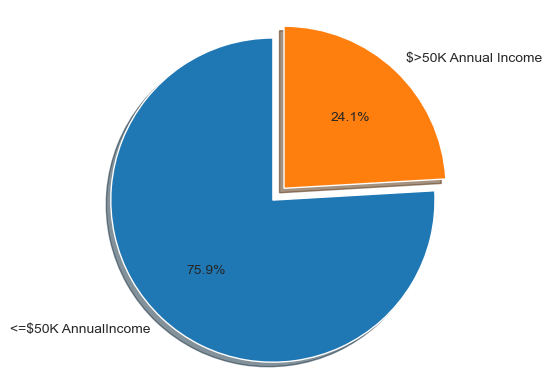

In [24]:
# pie chart representation for income distribution
classes=df_test['income'].value_counts()
le_share=classes[0]/df_test['income'].count()*100
g_share=classes[1]/df_test['income'].count()*100

labels = '<=$50K AnnualIncome', '$>50K Annual Income'
sizes = [le_share, g_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

The dataset is slightly imbalanced, with a 75.9% population with an annual income <=50K and a remaining 24.1% population with an annual income >50K. 

### Analyzing Features & Target Variable 
- Visualizations for the numerical and categorical feature columns and the 'income' target variable

#### Numeric Features Histograms 

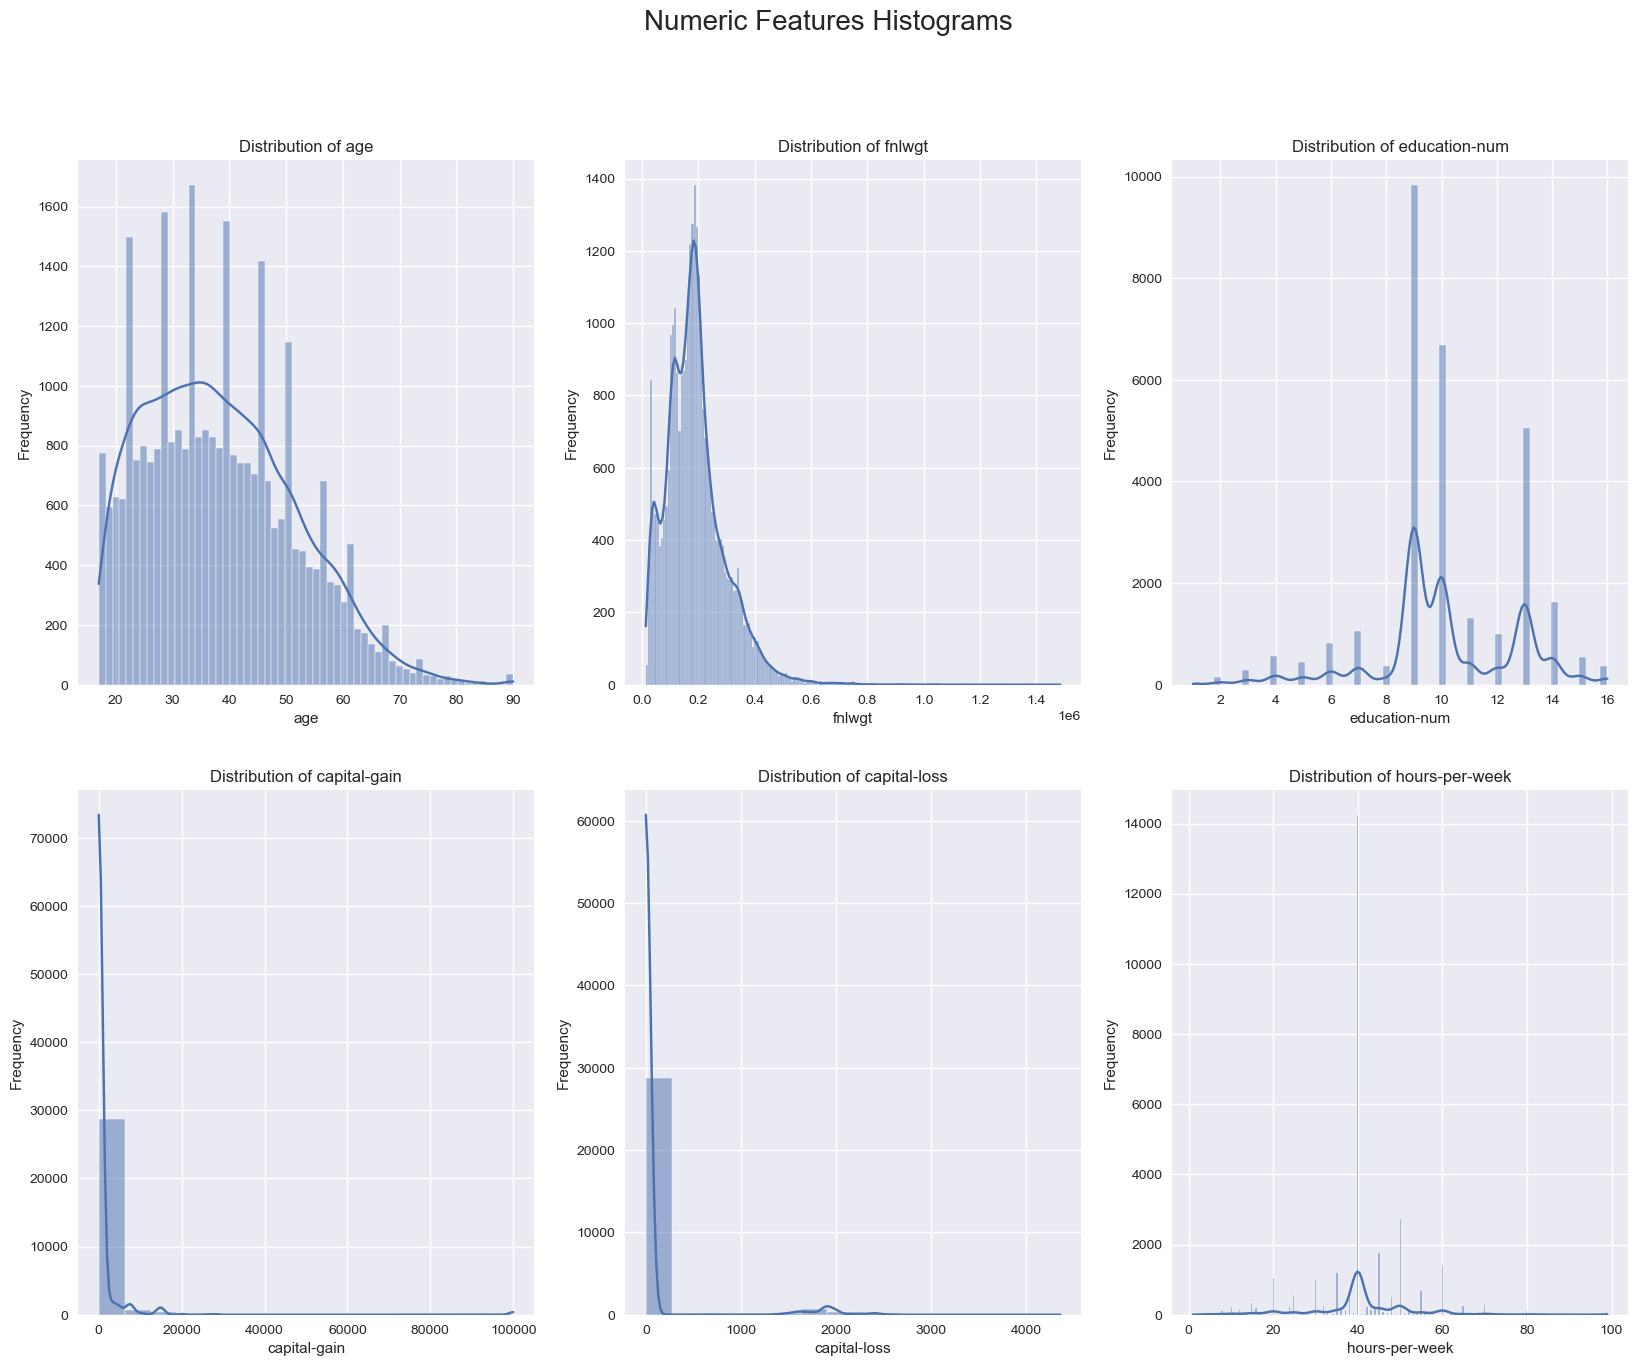

In [37]:
# plot style
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Numeric Features Histograms', fontsize=20)

# histograms for numeric features 
for i, feature in enumerate(numerical_columns):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=feature, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

    
plt.show()

The distribution of age and education-num features are generally evenly distributed. 
Capital gain and lost are skewed to the left.  

#### Categorial Features Charts

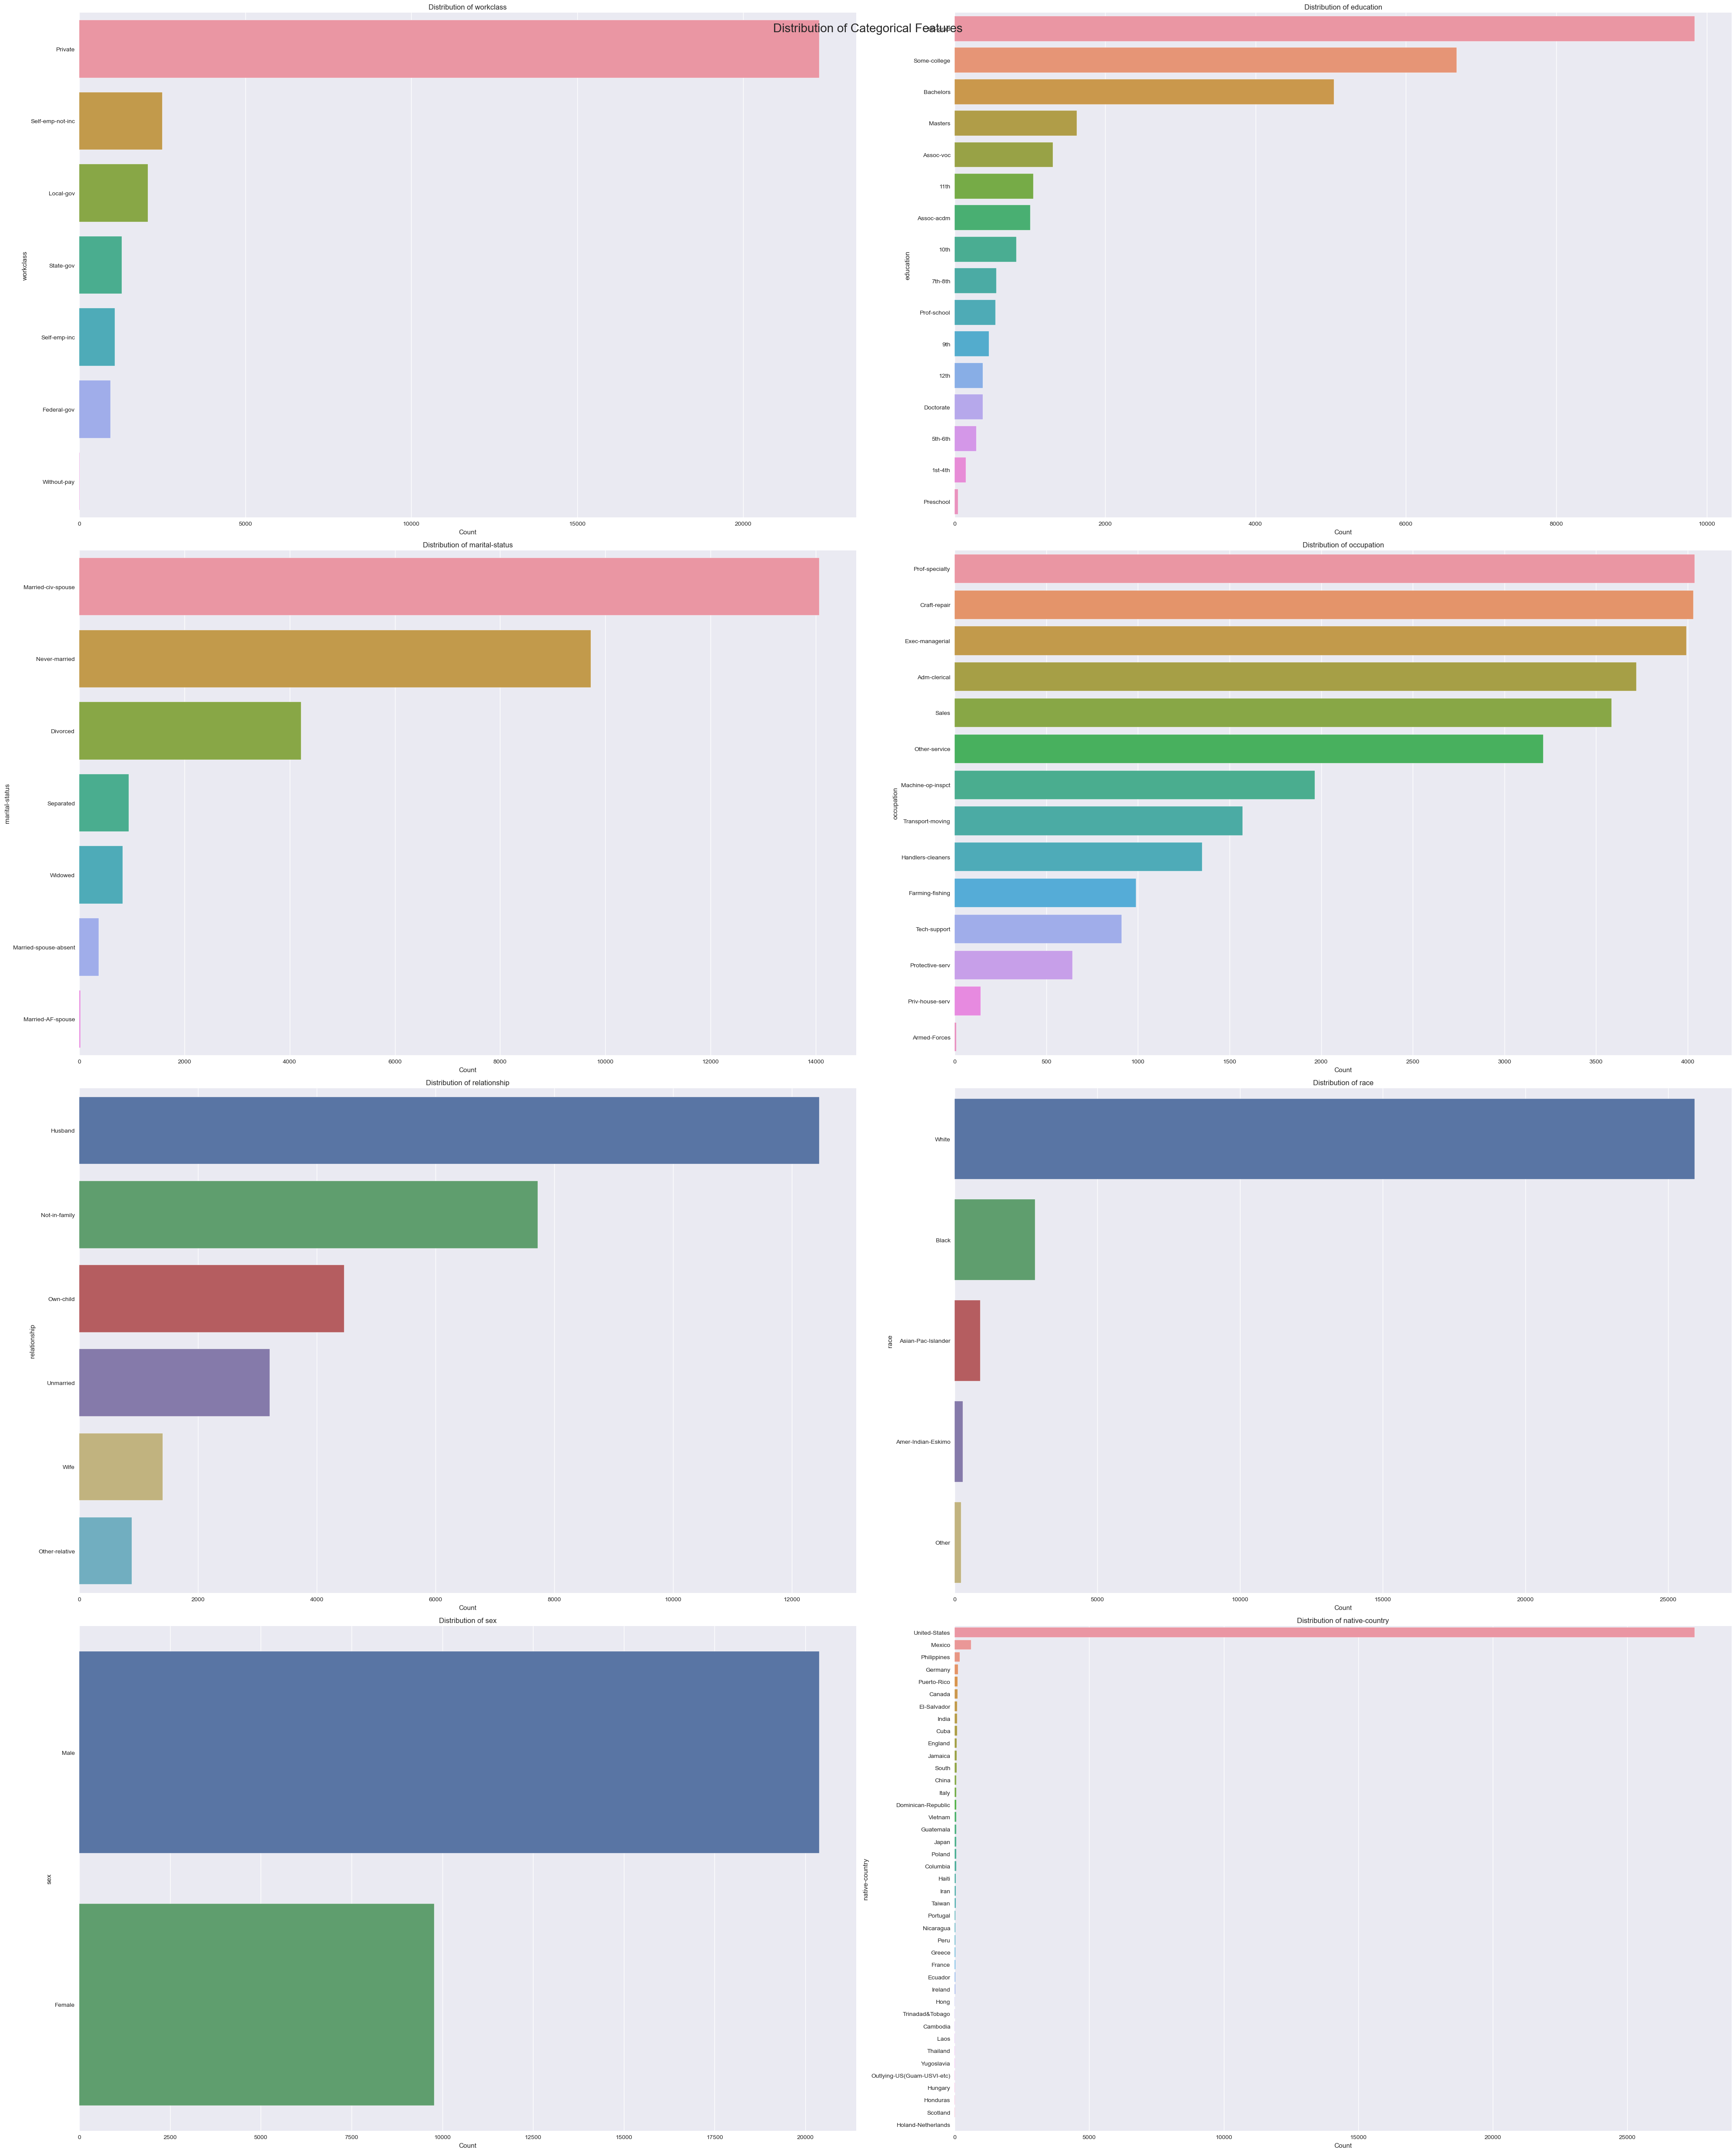

In [42]:
fig, axes = plt.subplots(4, 2, figsize=(40, 50))
fig.suptitle('Distribution of Categorical Features', fontsize=20)

for i, feature in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, y=feature, ax=axes[row, col], order=df[feature].value_counts().index)
    axes[row, col].set_title(f'Distribution of {feature}')
    axes[row, col].set_xlabel('Count')
    axes[row, col].set_ylabel(feature)

plt.tight_layout()
plt.show()

The groups within each categorical feature are generally not evenly distributed. For example, the private workclass, white race, and United States native country have significantly larger counts than the other working classes. 

#### Outliers in Numerical Features

[Text(0.5, 1.0, 'Numerical Feature Values Distribution')]

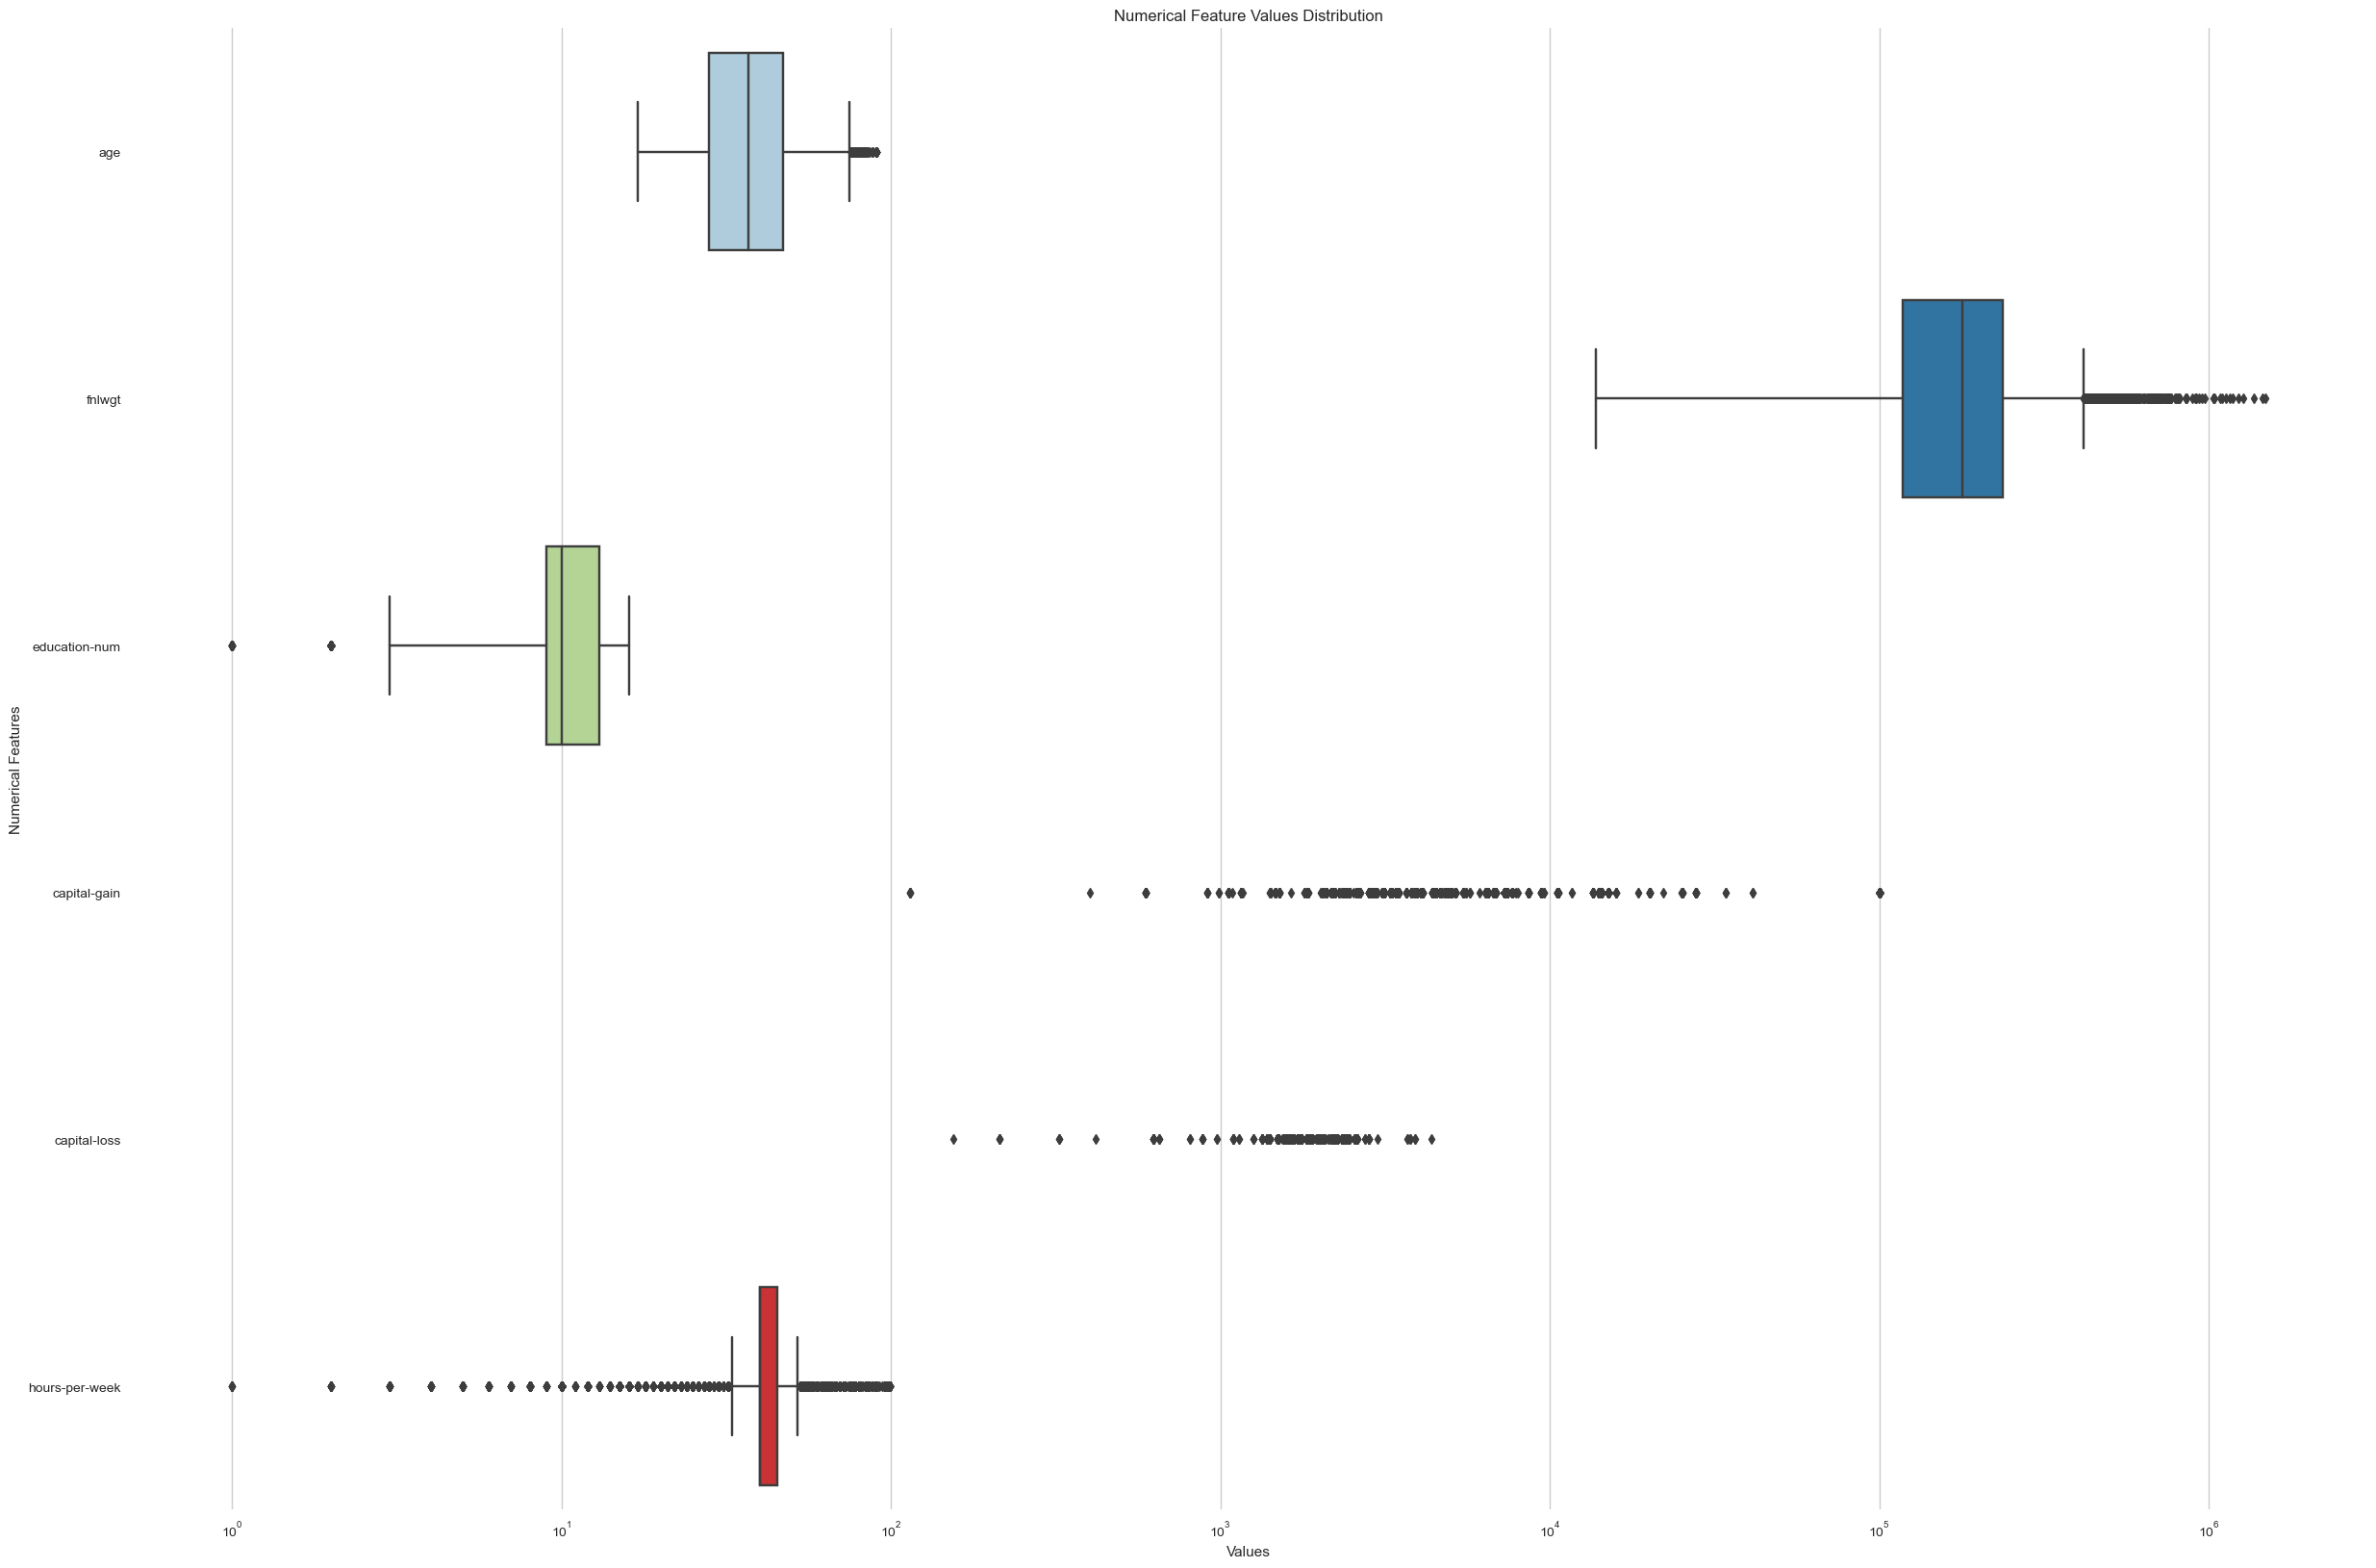

In [46]:
# boxplot to visualization the distribution of the numerical categories

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(30,20))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=df[numerical_columns], orient="h", palette="Paired")
ax.set(ylabel="Numerical Features")
ax.set(xlabel="Values")
ax.set(title="Numerical Feature Values Distribution")
#sns.despine(trim=True,left=True)

The hours-per-week and fnlwgt categories have a wider distribution. Statistical outliers are present in both.

#### Correlations for Numerical Features

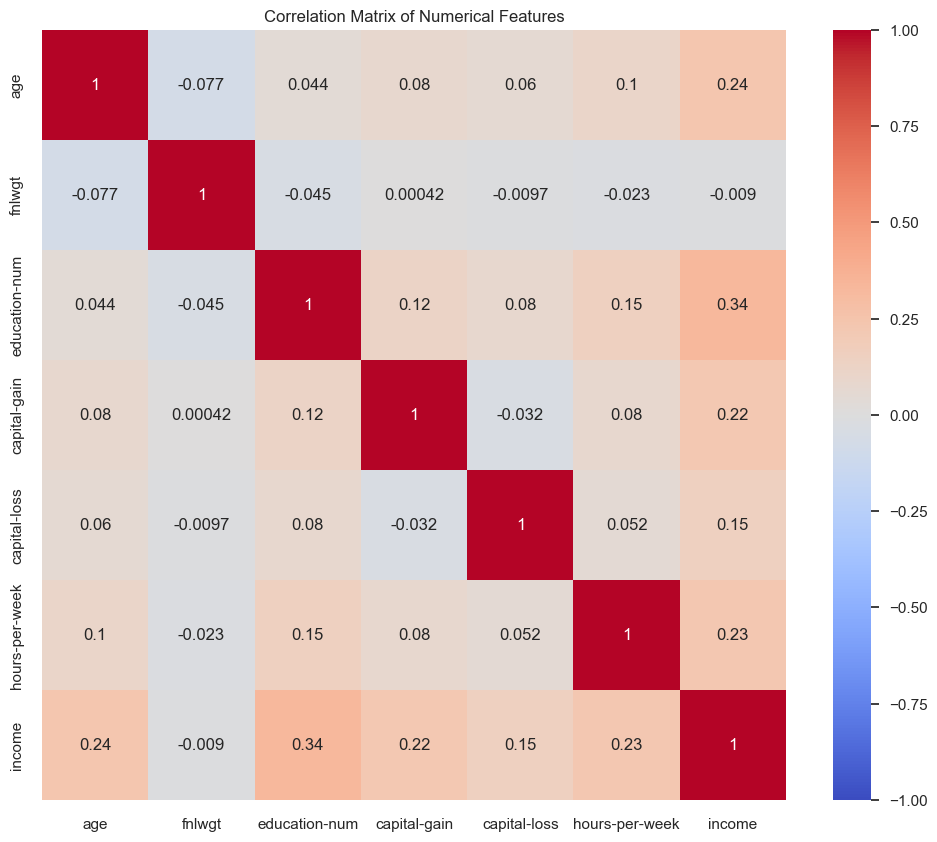

In [57]:
# correlation matrix
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
        
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [58]:
display(corr_matrix)

age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076511       0.043526      0.080154      0.060165   
fnlwgt         -0.076511  1.000000      -0.044992      0.000422     -0.009750   
education-num   0.043526 -0.044992       1.000000      0.124416      0.079646   
capital-gain    0.080154  0.000422       0.124416      1.000000     -0.032229   
capital-loss    0.060165 -0.009750       0.079646     -0.032229      1.000000   
hours-per-week  0.101599 -0.022886       0.152522      0.080432      0.052417   
income          0.241998 -0.008957       0.335286      0.221196      0.150053   

                hours-per-week    income  
age                   0.101599  0.241998  
fnlwgt               -0.022886 -0.008957  
education-num         0.152522  0.335286  
capital-gain          0.080432  0.221196  
capital-loss          0.052417  0.150053  
hours-per-week        1.000000  0.229480  
income                0.229480  1.000000

/Users/aliceliu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


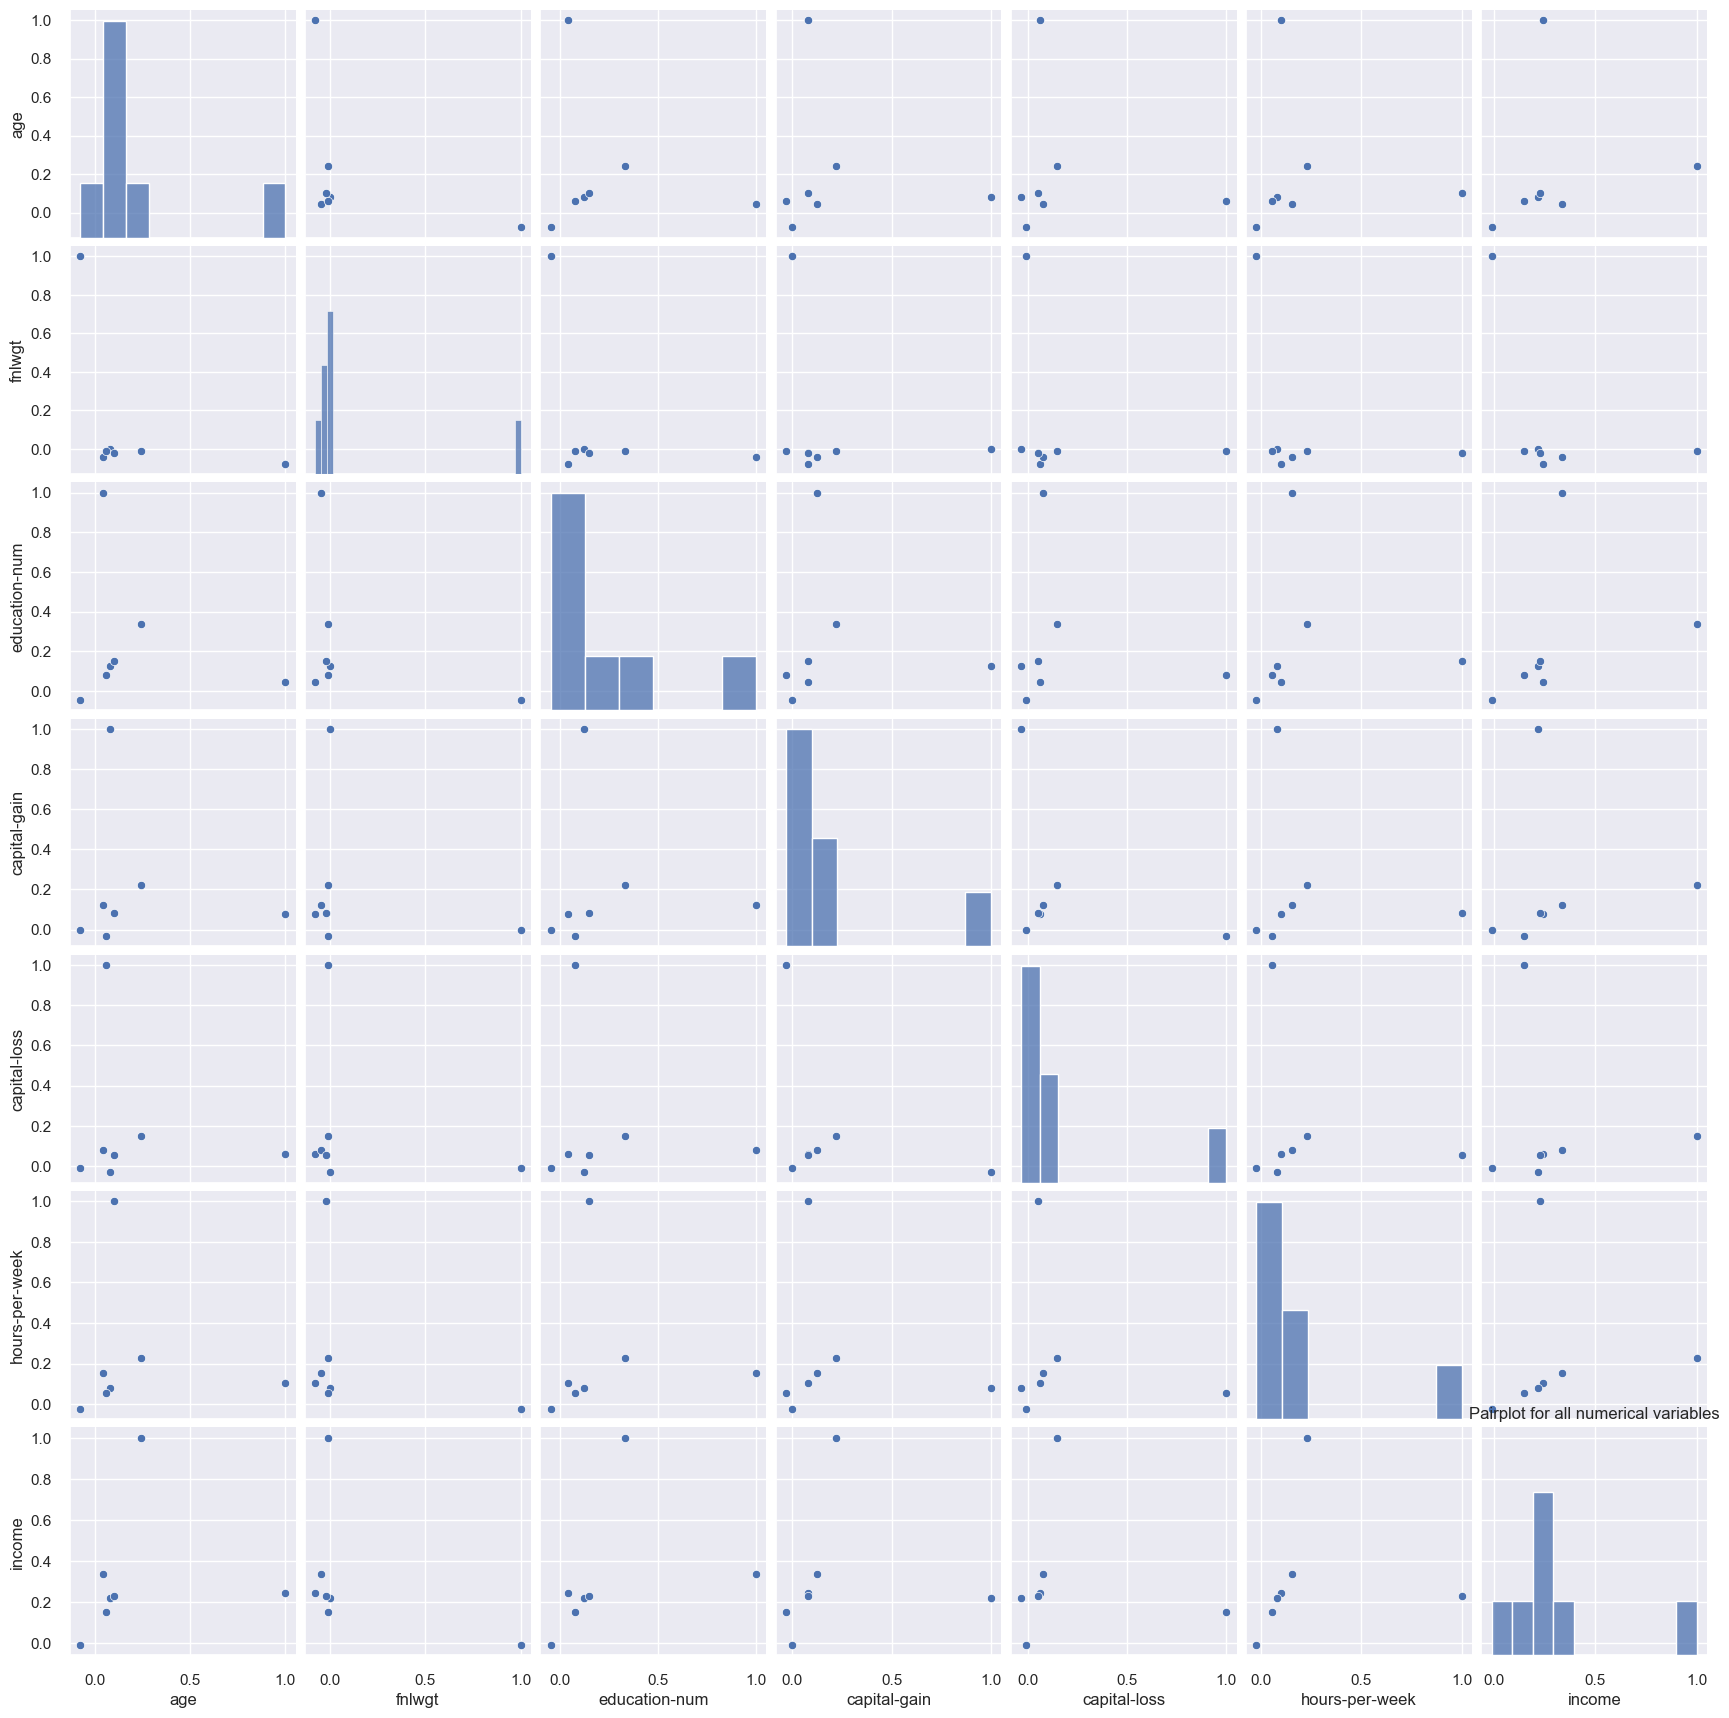

In [60]:
# pairplot for evaluating correlations between numerical features 
sns.set(font_scale=1) 
sns.pairplot(corr_matrix) 
plt.title("Pairplot for all numerical variables")
plt.show()

In [63]:
# correlation between income and numerical features 
for feature in numerical_features[:-1]:  # exclude income 
    correlation = stats.pointbiserialr(df['income'], df[feature])
    print(f"Correlation between {feature} and income: {correlation.correlation:.4f} (p-value: {correlation.pvalue:.4f})")

Correlation between age and income: 0.2420 (p-value: 0.0000)
Correlation between fnlwgt and income: -0.0090 (p-value: 0.1198)
Correlation between education-num and income: 0.3353 (p-value: 0.0000)
Correlation between capital-gain and income: 0.2212 (p-value: 0.0000)
Correlation between capital-loss and income: 0.1501 (p-value: 0.0000)
Correlation between hours-per-week and income: 0.2295 (p-value: 0.0000)


Income appears to have a generally weak correlation with the other numerical features. The strongest correlation is present with education-num, with a value of 0.34. However, most numerical features are positively correlated with income. 

### Bivariate Analysis 
- Analysis of relationships between categorical features and income

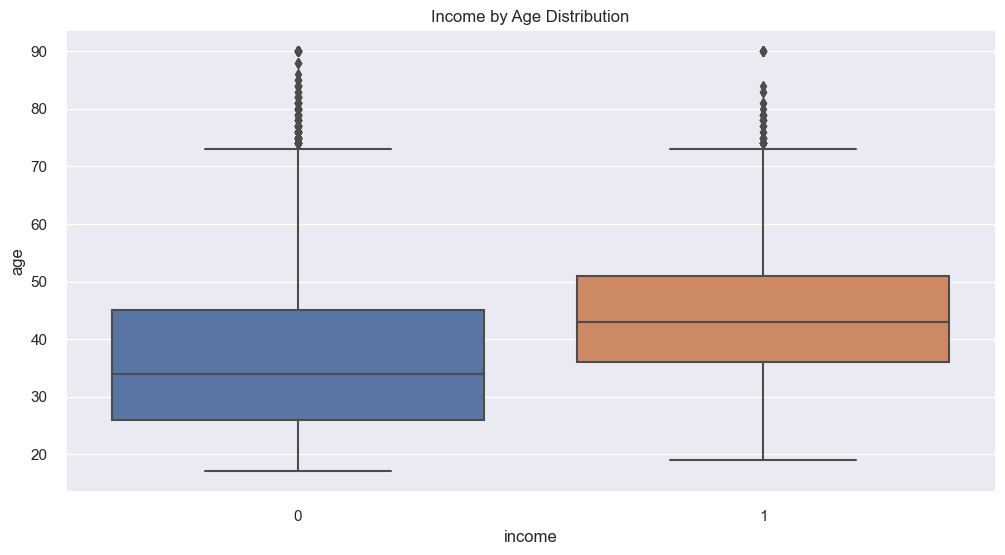

In [68]:
#### Age and Income Relationship 
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Income by Age Distribution')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, '17.0'),
  Text(1, 0, '18.0'),
  Text(2, 0, '19.0'),
  Text(3, 0, '20.0'),
  Text(4, 0, '21.0'),
  Text(5, 0, '22.0'),
  Text(6, 0, '23.0'),
  Text(7, 0, '24.0'),
  Text(8, 0, '25.0'),
  Text(9, 0, '26.0'),
  Text(10, 0, '27.0'),
  Text(11, 0, '28.0'),
  Text(12, 0, '29.0'),
  Text(13, 0, '30.0'),
  Text(14, 0, '31.0'),
  Text(15, 0, '32.0'),
  Text(16, 0, '33.0'),
  Text(17, 0, '34.0'),
  Text(18, 0, '35.0'),
  Text(19, 0, '36.0'),
  Text(20, 0, '37.0'),
  Text(21, 0, '38.0'),
  Text(22, 0, '39.0'),
  Text(23, 0, '40.0'),
  Text(24, 0, '41.0'),
  Text(25, 0, '42.0'),
  Text(26, 0, '43.0'),
  Text(27, 0, '44.0'),
  Text(28, 0, '45.0'),
  Text(29, 0,

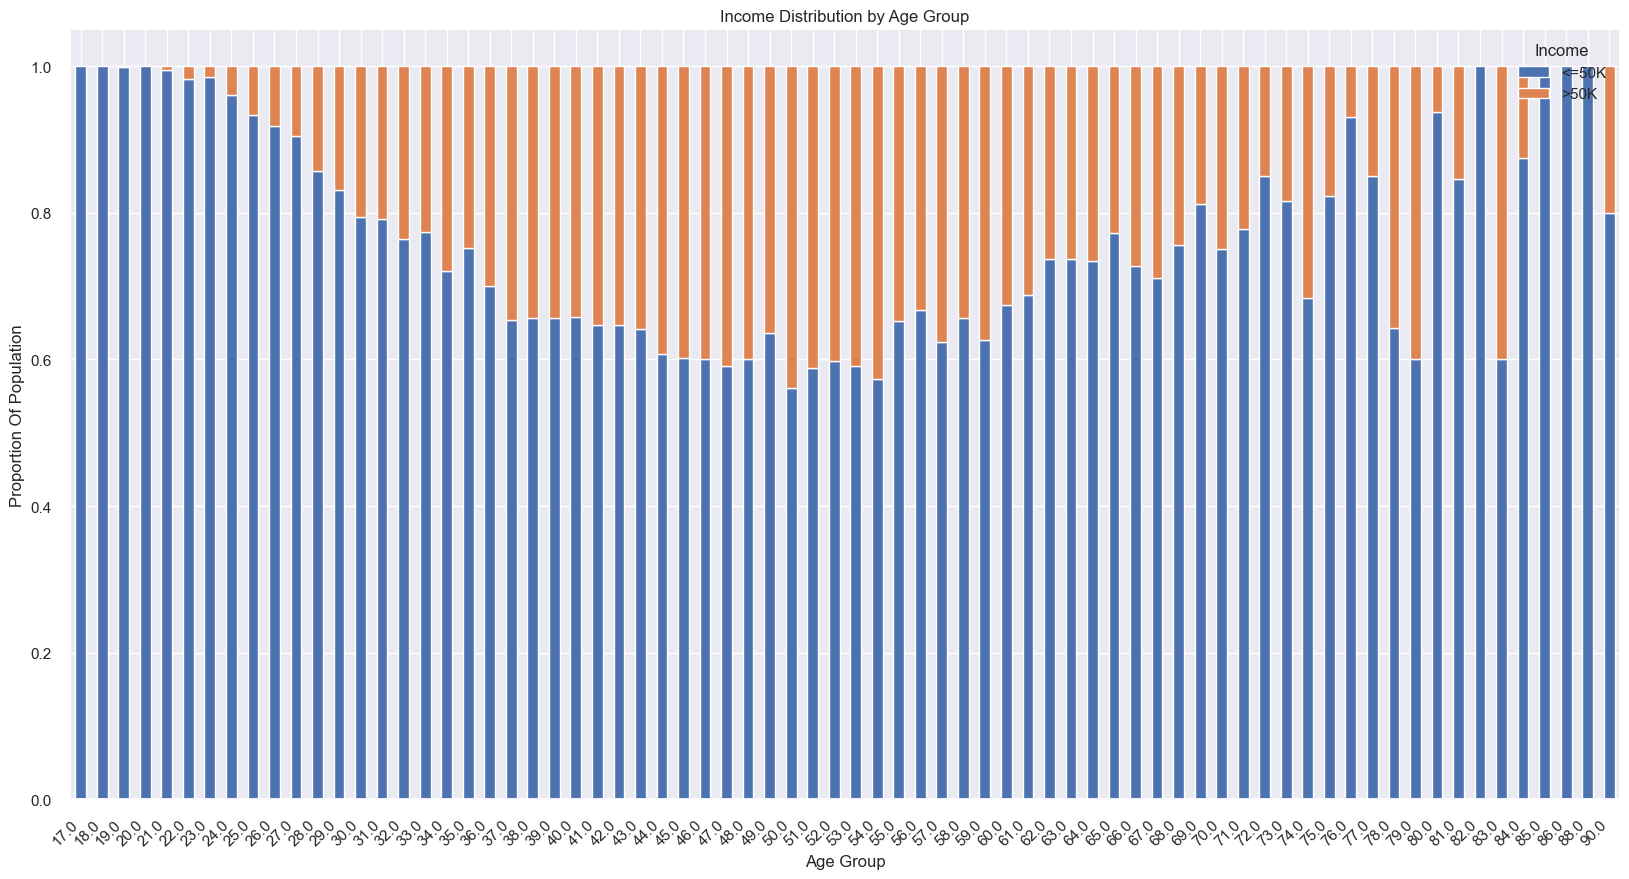

In [69]:
age_income = pd.crosstab(df['age'], df['income'], normalize='index')
age_income.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion Of Population')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')

Higher income levels (>50K) are more prevalent in older age groups. The median for higher income (>50K) is in the 40s while the median for lower income (<50K) is in the 30s. The median for higher income is only slightly higher than the upper quartile for lower income.

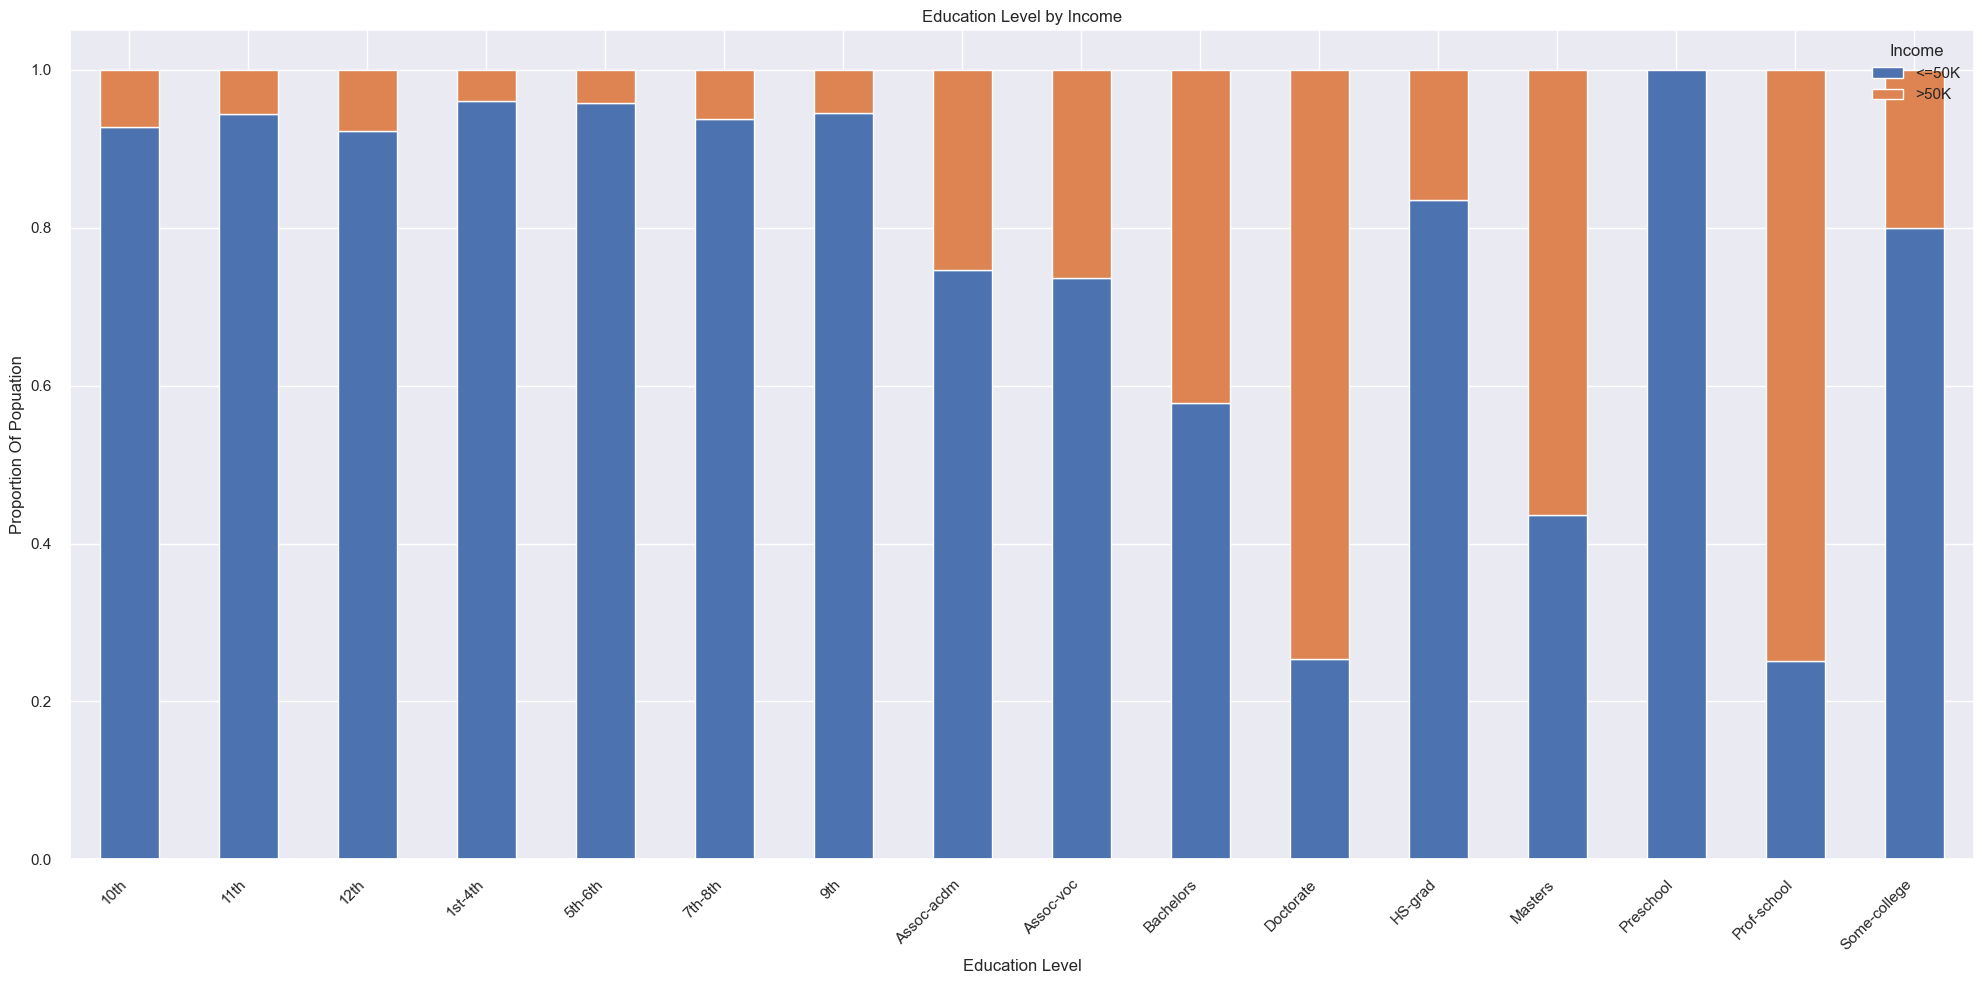

In [70]:
# education and income relationship 
education_income = pd.crosstab(df['education'], df['income'], normalize='index')
education_income.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Education Level by Income')
plt.xlabel('Education Level')
plt.ylabel('Proportion Of Popuation')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As education levels increase, the proportion of individuals earning >50K annually also increase. The master's degree group is the starting point where individuals earning >50K annually is a majority.

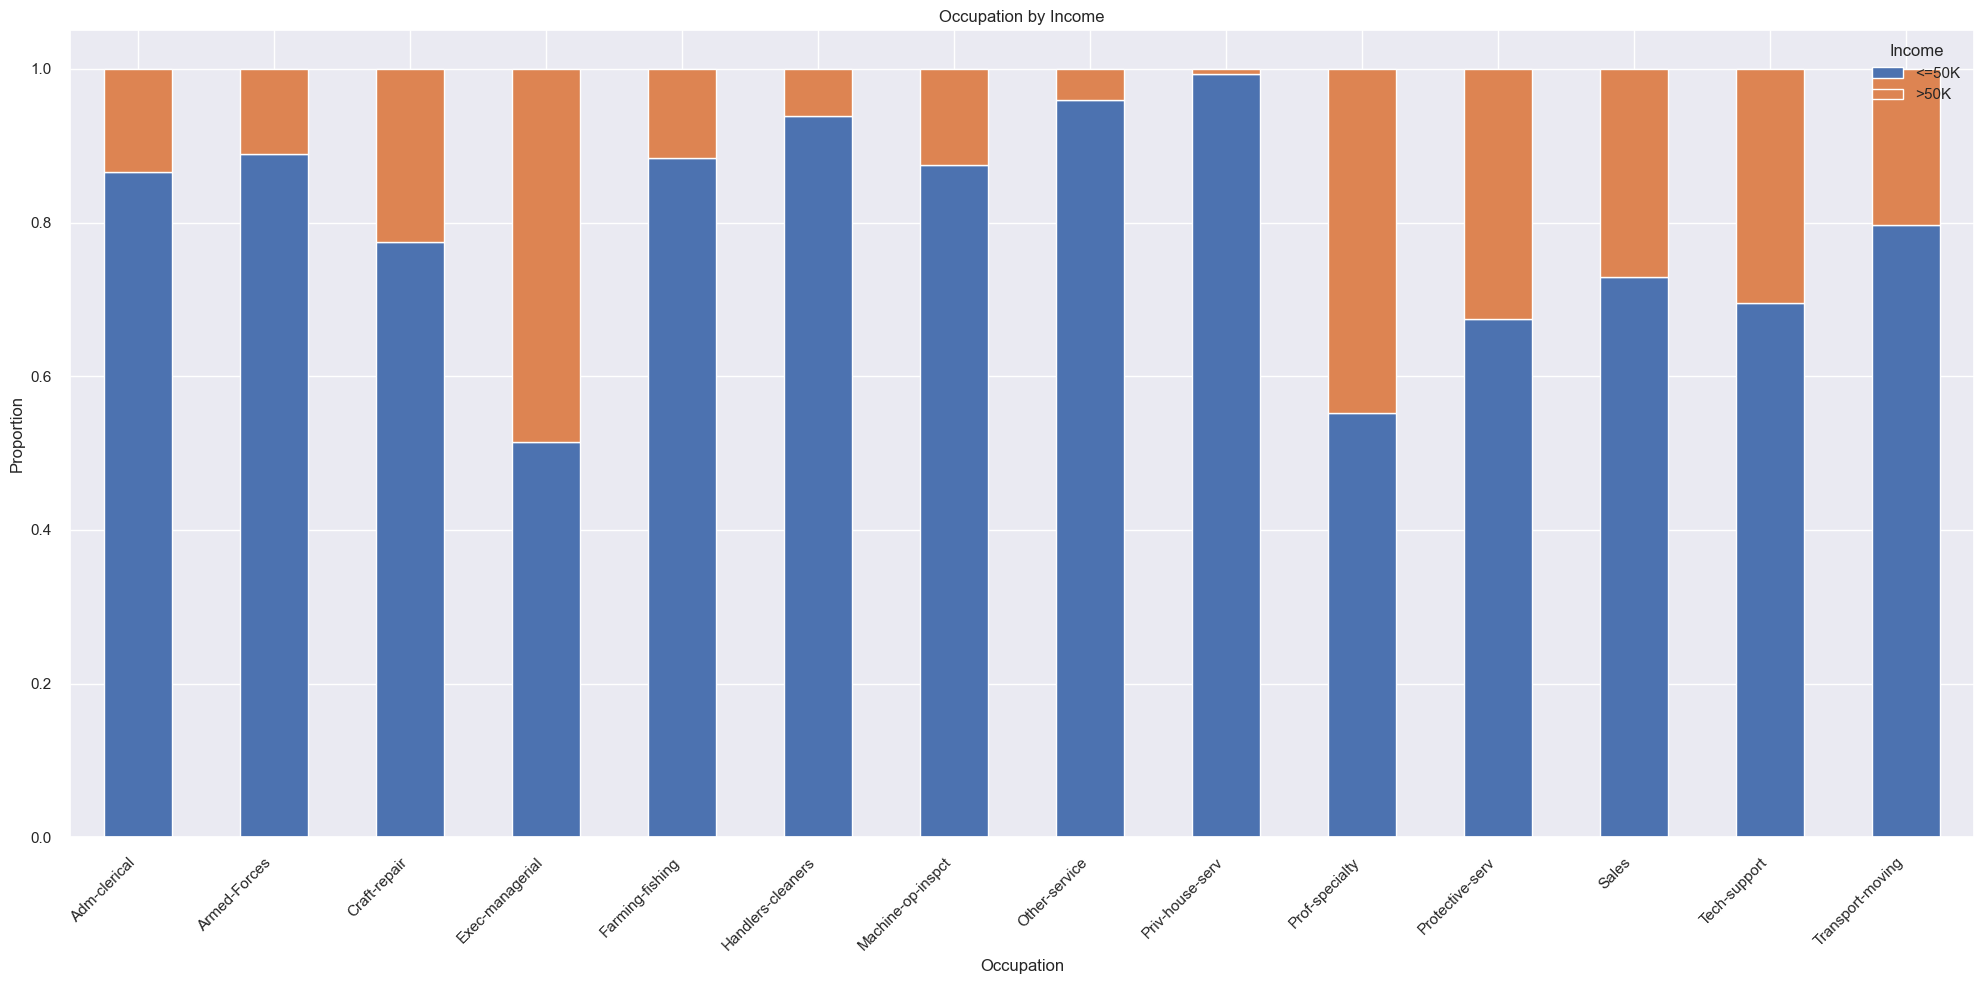

In [71]:
# occupation and income relationship 
occupation_income = pd.crosstab(df['occupation'], df['income'], normalize='index')
occupation_income.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Occupation by Income')
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The profession groups in exec-managerial and prof-specialty have the highest number of individuals earning >50K while groups in priv-house-serv, handlers-cleaners-and farming-fishing are the lowest.

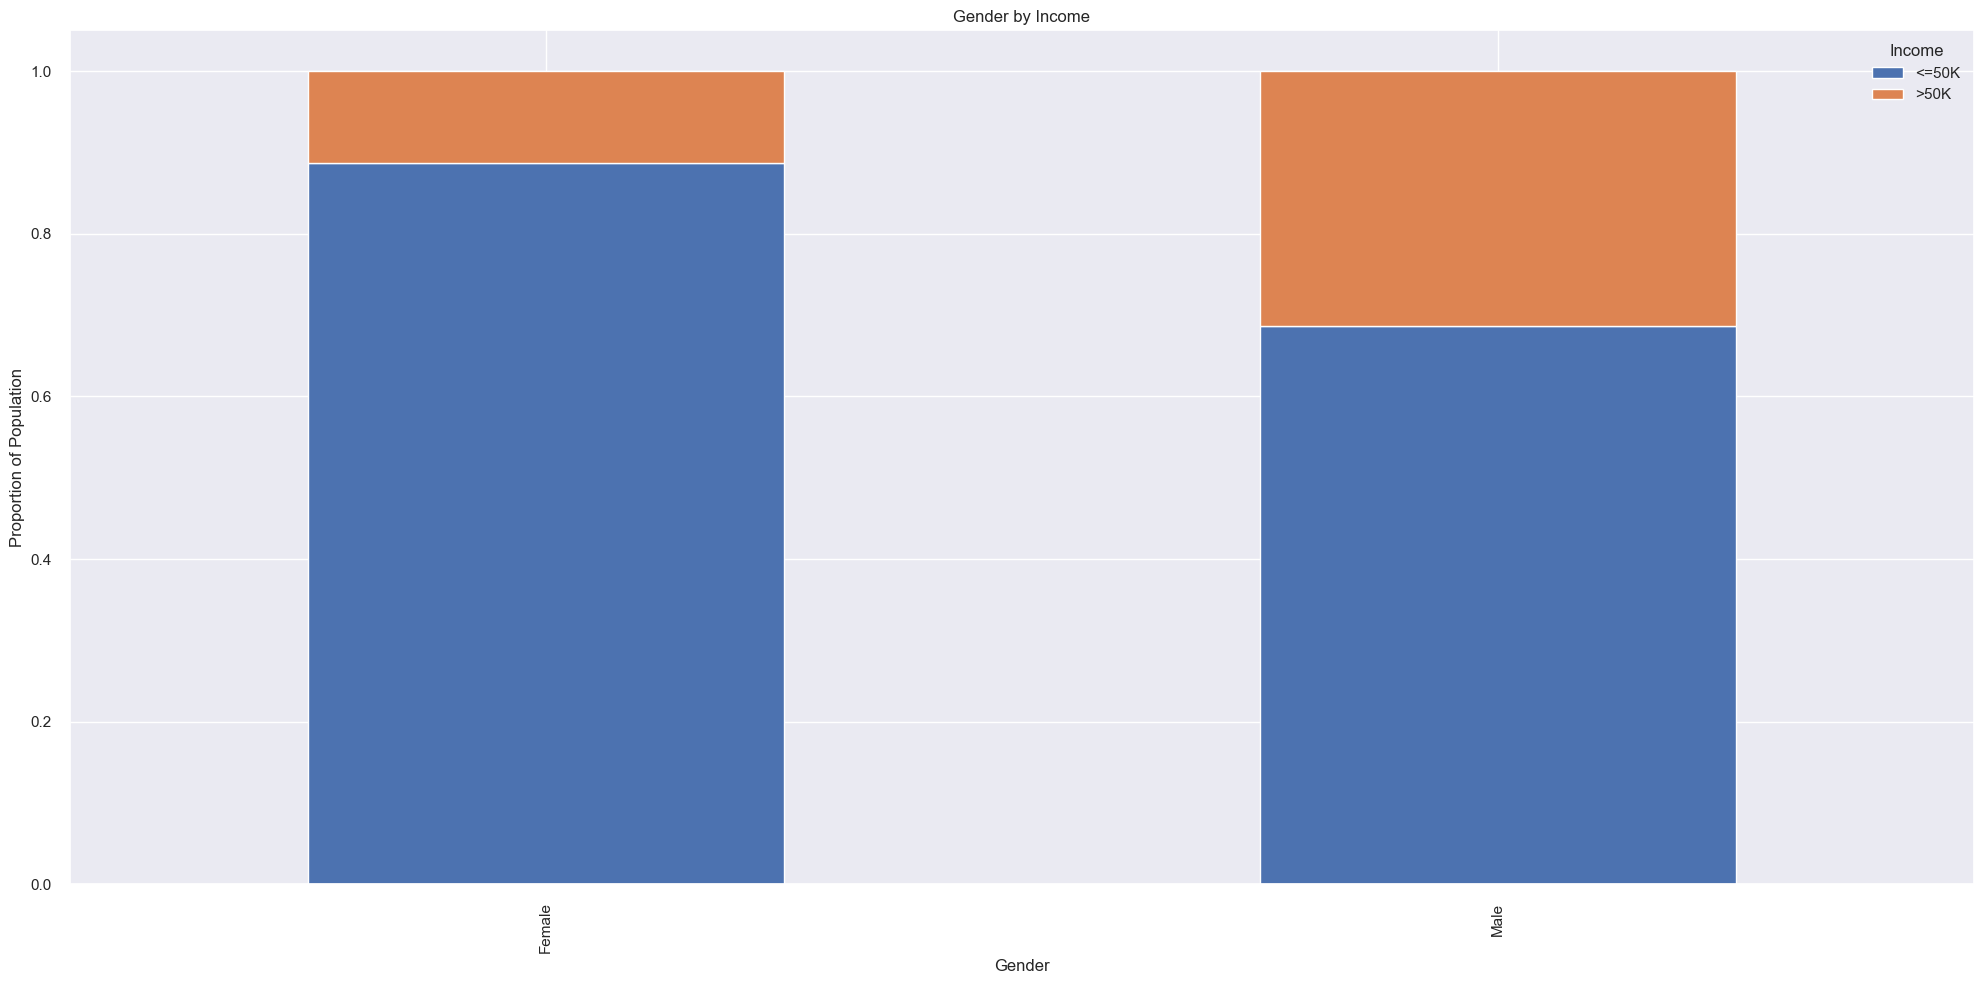

In [72]:
# gender and income relationship
gender_income = pd.crosstab(df['sex'], df['income'], normalize='index')
gender_income.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Gender by Income')
plt.xlabel('Gender')
plt.ylabel('Proportion of Population')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.tight_layout()
plt.show()

The proportion of males earning >50K annually is higher than that of their female counterparts.

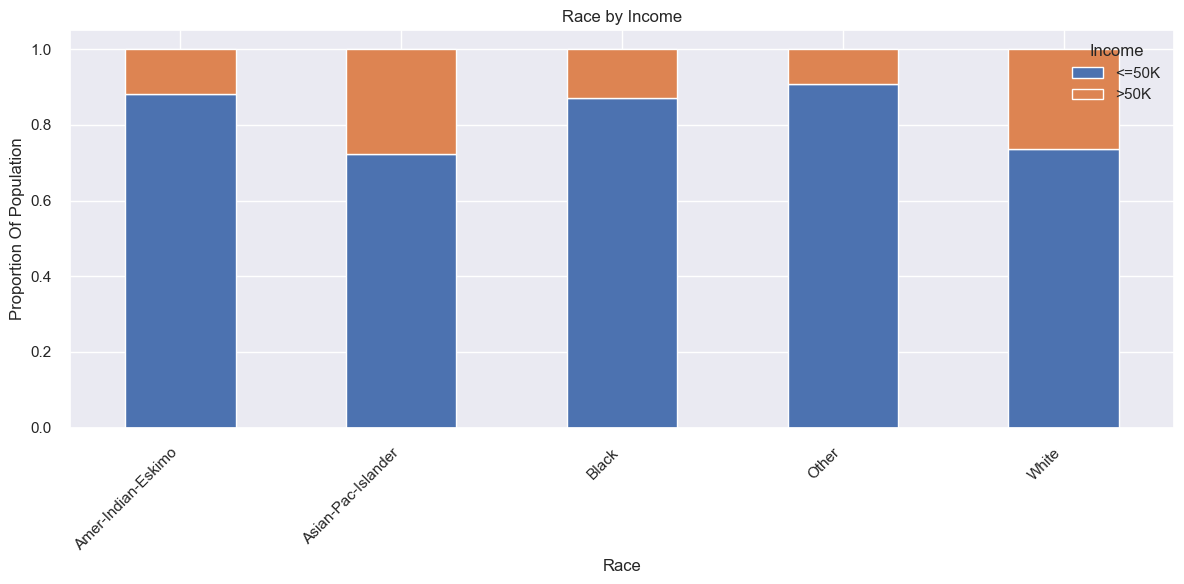

In [73]:
# race and income relationship 
race_income = pd.crosstab(df['race'], df['income'], normalize='index')
race_income.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Race by Income')
plt.xlabel('Race')
plt.ylabel('Proportion Of Population')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The proportion of white and asian-pac-islander race groups earning >50K annually are highest in this dataset.

### Multivariate Analysis & Data Visualization
- Parallel Coordinates Plot 
- Statistical tests: chi-square (categorial), t-tests (numerical) 
- Random Forest for feature importance analysis

#### Parallel Coordinates Plot 

In [80]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# numerical features for plot 
parallel_feat = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']
plot_df = df[parallel_feat].copy()

In [81]:
# normalize features to keep scale uniform
scaler = MinMaxScaler()
plot_df.iloc[:, :-1] = scaler.fit_transform(plot_df.iloc[:, :-1])

In [83]:
# create plot
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = plot_df['income'],
                    colorscale = [[0, 'blue'], [1, 'red']]), # red = >50K, blue = <=50K 
        dimensions = [
            dict(range = [0, 1],
                 label = 'Age', values = plot_df['age']),
            dict(range = [0, 1],
                 label = 'Number of Education Years', values = plot_df['education-num']),
            dict(range = [0, 1],
                 label = 'Capital Gain', values = plot_df['capital-gain']),
            dict(range = [0, 1],
                 label = 'Capital Loss', values = plot_df['capital-loss']),
            dict(range = [0, 1],
                 label = 'Hours per Week', values = plot_df['hours-per-week']),
            dict(range = [0, 1],
                 tickvals = [0, 1],
                 ticktext = ['<=50K', '>50K'],
                 label = 'Income', values = plot_df['income'])
        ]
    )
)

In [84]:
# improve readability 
fig.update_layout(
    title='Interactive Parallel Coordinates Plot of Income Predictors',
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

Age and hours per week have a mixed distribution-- there isn't a particular age range or number of hours per week that correlates to individuals earning above or below 50K annually. Those earning above 50K annually tend to have a higher number of years spent in education and capital gain than those earning below 50K annually. Those earning below 50K annually tend to have a higher capital loss than those earning above. 

In [90]:
# chi-square: categorial features vs income 

for feature in categorical_columns:
    contingency_table = pd.crosstab(df[feature], df['income'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {feature} vs. income:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")

Chi-square test for workclass vs. income:
Chi-square statistic: 804.1575
p-value: 0.0000
Chi-square test for education vs. income:
Chi-square statistic: 4070.3816
p-value: 0.0000
Chi-square test for marital-status vs. income:
Chi-square statistic: 6061.7480
p-value: 0.0000
Chi-square test for occupation vs. income:
Chi-square statistic: 3687.6207
p-value: 0.0000
Chi-square test for relationship vs. income:
Chi-square statistic: 6233.8405
p-value: 0.0000
Chi-square test for race vs. income:
Chi-square statistic: 304.2414
p-value: 0.0000
Chi-square test for sex vs. income:
Chi-square statistic: 1415.2864
p-value: 0.0000
Chi-square test for native-country vs. income:
Chi-square statistic: 317.7367
p-value: 0.0000


The p-values are all reported as 0.0000, meaning that all these tested categorical variables have a signficiant relationship statistically with income level. 

Relationship and marital status have the strongest correlations with income level. Race and native country have the weakest correlations. The relationships for features such as sex and race may indicate potential bias areas in the income distributions.  

In [91]:
# t-tests: numerical variables vs. income
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for feature in numerical_features:
    t_stat, p_value = stats.ttest_ind(df[df['income'] == 0][feature], df[df['income'] == 1][feature])
    print(f"T-test for {feature} vs. income:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")

T-test for age vs. income:
T-statistic: -43.3144
p-value: 0.0000
T-test for fnlwgt vs. income:
T-statistic: 1.5557
p-value: 0.1198
T-test for education-num vs. income:
T-statistic: -61.8055
p-value: 0.0000
T-test for capital-gain vs. income:
T-statistic: -39.3901
p-value: 0.0000
T-test for capital-loss vs. income:
T-statistic: -26.3576
p-value: 0.0000
T-test for hours-per-week vs. income:
T-statistic: -40.9457
p-value: 0.0000


The p-values are all reported as less than 0.0001, meaning that all these tested categorical variables have a signficiant relationship statistically with income level.

All the values in the t-test are negative, indicating that the average for the >50K group is higher than that of the <=50K group. All groups, excluding fnlwgt, show a significant difference between the income groups for the respective measure. The t-statistic is highest for that of 1) education-num 2) age 3) hours-per-week. 

#### Random Forest: Feature Importance

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# data preparation 
X = df.drop('income', axis=1) # include all features, excluding the target variable 
y = df['income'] # income is the target variable 

In [97]:
# encode all categorical variables 
le = LabelEncoder()
for feature in categorical_columns:
    X[feature] = le.fit_transform(X[feature])

In [98]:
# build model using default classifier from sklearn
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# fit model
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

In [99]:
# retrieve feature importances 
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

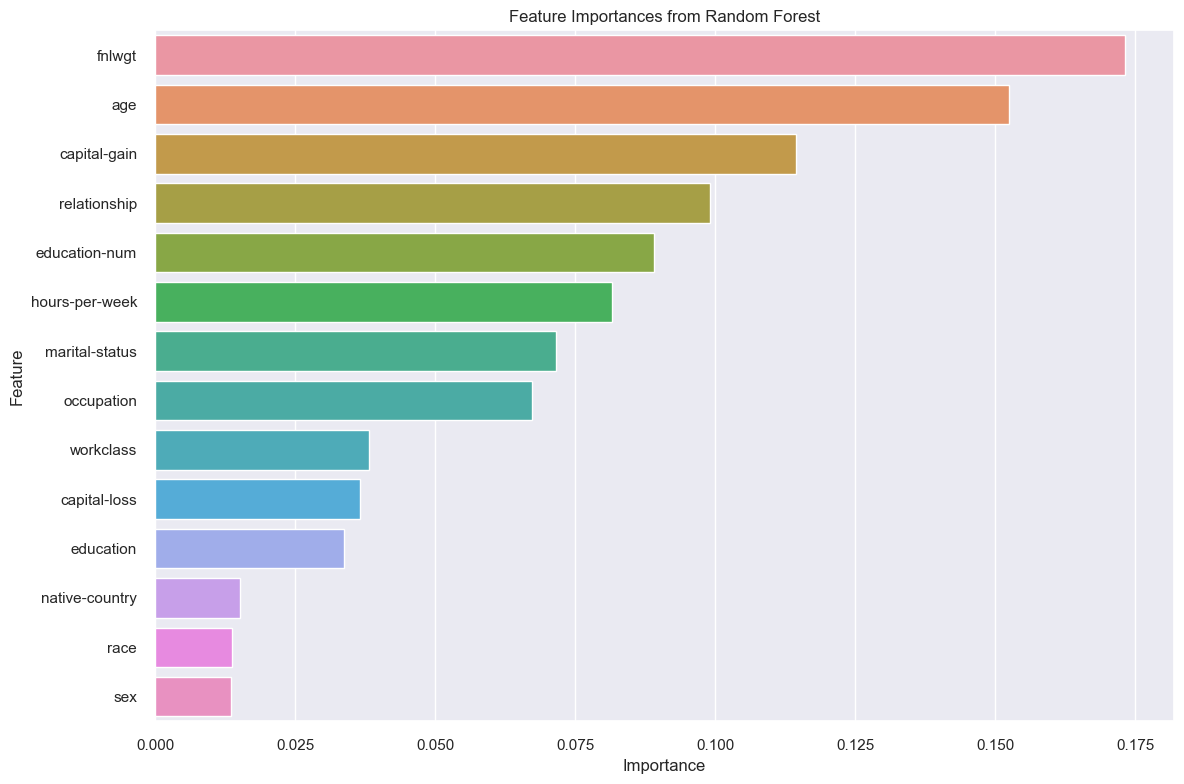

In [100]:
# visualization for feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The top five features (excluding fnlwgt) most critical in predicting values of the income target variable with the highest accuracy are: 1) age 2) capital gain 3) relationship 4) education-num 5) hours-per-week. The top five features least critical are 1) education 2) native-country 3) race 4) sex. 

### Exploratory Data Analysis Results

Summary of Results: 

The distribution of age and education-num features are generally evenly distributed in their ranges from the histograms. 

Education-num consistently showed the strong positive correlations with income in the correlation matrix, parallel coordinates plot, statistical analysis tests and feature analysis using Random Forest. 

Higher income levels (earning >50K annually) tend to be more prevalent in older age groups with a median in the 40s than that of lower income levels (bivariate analysis). Age was also shown to be a prevalent factor in the statistical analysis test and random forest classifier, but showed a mixed distribution in the parallel coordinates plot. 

The hours per week category indicated similar behavior to the age group category. Though this category had a mixed distribution in the parallel coordinates plot, it had the highest correlation for income level in the statistic analysis test. 

The exec-managerial and prof-specialty occupational groups, male gender group, and white and asian-pac-islander race groups have the highest percentage of individuals earning >50K annually. Sex was also shown to be a strong factor in the statistical analysis tests. Relationship and marital status also have strong correlations with income level. 

## Part Two: Biases Discussion

### Potential Biases

Age groups also have potential biases attached. Many individuals do not begin working and earning consistent income until their 20s. Older individuals also had more time to advance in their careers, which may lead to higher income levels. Older individuals may have also experienced better economic and job market conditions or had more opportunities for education and career development, which can also lead to higher income. 

Using race or sex as predictive features could sustain historical and societal biases. The data, does not take into consideration factors such as gender pay gap or biases relating to career breaks from family responsibilities. For example, career breaks are almost 3x more common for women compared to men: https://www.mckinsey.com/featured-insights/diversity-and-inclusion/women-in-the-workplace. 

In terms of race, potential biases may exist in educational access gaps and disparities in generational wealth. For example, the unemployment rate for the black race group has consistently been around twice that of the white race group for the last half century:https://www.jec.senate.gov/public/index.cfm/democrats/2023/2/national-and-state-level-data-on-the-economic-status-of-black-americans-2023

It is also important to consider that the groups within each categorical feature aren't evenly distributed from the Census data. The count is greater for the following groups: white in "race", males in "sex" (over double than the count for females), United States in "native-country" and private-workclass in "workclass". 


### Mitigating Biases 

Mitigating Biases:

The following can be implemented in mitigating biases relating to age, gender and race for the model: 
- removing sex and race from the feature set 
- unsampling the minority class (>50K income) to prevent bias towards the majority class 
- creating interactions between different categories, including 1) age and education 2) age and hours work. This can better determine how age on income may differ with educational level of work hours and potentially mitigate biases relating to age groups 
- considering age to be a non-linear feature and using pd.cut() to create ranges for model to identify non-linear relationships between age and income 
- ensuring that the training data for the models includes a more balanced representation of the age groups 

## Part Three: Predictive Modeling

The objective is to implement a model that predicts whether an individual earns more than 50K annually based on the demographic and work-related features from the dataset while incorporating bias mitigation strategies. 

Supervised classification models were used, as this is a binary classification model. 

The following models were implemented for the prediction: 
- Logistic Regression 
- Random Forest 
- Gradient Boosting (XGBoost) 
- Support Vector Machines 

### Data Preparation 

In [133]:
# imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample

In [134]:
# create age ranges using d.cut() to make age a non-linear feature 
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

In [135]:
# interactions between 1) age and edcuation 2) age and hours 
df['age_education'] = df['age'] * df['education-num']
df['age_hours'] = df['age'] * df['hours-per-week']

In [153]:
# remove gender and race features 
drop_feat = ['sex', 'race', 'age'] # using age_group instead of age 
keep_feat = [col for col in df.columns if col not in drop_feat + ['income']]

In [154]:
X = df.drop(['income'] + drop_feat, axis=1)
y = df['income'].map({'>50K': 1, '<=50K': 0})

In [155]:
# encode income target variable 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [158]:
# one hot encoding for updated categorical variables 
updated_categorical = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country', 'age_group']
X = pd.get_dummies(X, columns=updated_categorical, drop_first=True)

In [160]:
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
X_train # view select rows in X_train

fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
19863  168539.0            5.0           0.0           0.0            70.0   
24342   56841.0           13.0           0.0           0.0            70.0   
10027  154571.0           10.0           0.0           0.0            40.0   
25710  188236.0            6.0           0.0           0.0            40.0   
13824   87158.0            9.0           0.0           0.0            40.0   
...         ...            ...           ...           ...             ...   
32171   67852.0            9.0           0.0           0.0            35.0   
5875   120539.0           10.0        3103.0           0.0            40.0   
935    176900.0            9.0           0.0           0.0            99.0   
17056   51662.0            7.0           0.0           0.0            40.0   
25528  196328.0           13.0           0.0           0.0            40.0   

       age_education  age_hours  workclass_Local-gov  workclass_Private  \
19863          265.0     3710.0                False              False   
24342          637.0     3430.0                False              False   
10027          280.0     1120.0                False               True   
25710          360.0     2400.0                False               True   
13824          477.0     2120.0                False               True   
...              ...        ...                  ...                ...   
32171          360.0     1400.0                False               True   
5875           410.0     1640.0                False              False   
935            333.0     3663.0                False               True   
17056          392.0     2240.0                False              False   
25528          702.0     2160.0                False              False   

       workclass_Self-emp-inc  ...  native-country_Thailand  \
19863                   False  ...                    False   
24342                   False  ...                    False   
10027                   False  ...                    False   
25710                   False  ...                    False   
13824                   False  ...                    False   
...                       ...  ...                      ...   
32171                   False  ...                    False   
5875                    False  ...                    False   
935                     False  ...                    False   
17056                   False  ...                    False   
25528                    True  ...                    False   

       native-country_Trinadad&Tobago  native-country_United-States  \
19863                           False                          True   
24342                           False                          True   
10027                           False                         False   
25710                           False                          True   
13824                           False                          True   
...                               ...                           ...   
32171                           False                          True   
5875                            False                          True   
935                             False                          True   
17056                           False                          True   
25528                           False                         False   

       native-country_Vietnam  native-country_Yugoslavia  age_group_26-35  \
19863                   False                      False            False   
24342                   False                      False            False   
10027                   False                      False             True   
25710                   False                      False            False   
13824                   False                      False            False   
...                       ...                        ...              ...   
32171                 

In [162]:
X_test # view select rows in X_test

fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
234     76714.0           15.0           0.0           0.0            55.0   
26879  178431.0            9.0           0.0           0.0            40.0   
19182  290640.0            9.0           0.0           0.0            50.0   
13485  215297.0            9.0           0.0           0.0            45.0   
9625   188682.0           13.0           0.0           0.0            40.0   
...         ...            ...           ...           ...             ...   
27804   82488.0            9.0           0.0           0.0            40.0   
27039  535978.0           10.0           0.0           0.0            40.0   
28362  420986.0           13.0           0.0           0.0            40.0   
3720    56841.0            9.0           0.0           0.0            40.0   
6188   195488.0            9.0           0.0           0.0            52.0   

       age_education  age_hours  workclass_Local-gov  workclass_Private  \
234            420.0     1540.0                False               True   
26879          369.0     1640.0                False               True   
19182          477.0     2650.0                False               True   
13485          279.0     1395.0                False               True   
9625           442.0     1360.0                 True              False   
...              ...        ...                  ...                ...   
27804          252.0     1120.0                False               True   
27039          280.0     1120.0                False               True   
28362          611.0     1880.0                False               True   
3720           414.0     1840.0                False               True   
6188           297.0     1716.0                False               True   

       workclass_Self-emp-inc  ...  native-country_Thailand  \
234                     False  ...                    False   
26879                   False  ...                    False   
19182                   False  ...                    False   
13485                   False  ...                    False   
9625                    False  ...                    False   
...                       ...  ...                      ...   
27804                   False  ...                    False   
27039                   False  ...                    False   
28362                   False  ...                    False   
3720                    False  ...                    False   
6188                    False  ...                    False   

       native-country_Trinadad&Tobago  native-country_United-States  \
234                             False                          True   
26879                           False                         False   
19182                           False                         False   
13485                           False                          True   
9625                            False                          True   
...                               ...                           ...   
27804                           False                          True   
27039                           False                          True   
28362                           False                          True   
3720                            False                          True   
6188                            False                          True   

       native-country_Vietnam  native-country_Yugoslavia  age_group_26-35  \
234                     False                      False             True   
26879                   False                      False            False   
19182                   False                      False            False   
13485                   False                      False             True   
9625                    False                      False             True   
...                       ...                        ...              ...   
27804                 

### Logistic Regression

In [163]:
# imports
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [164]:
# view updated training data
df

age         workclass    fnlwgt   education  education-num  \
0      39.0         State-gov   77516.0   Bachelors           13.0   
1      50.0  Self-emp-not-inc   83311.0   Bachelors           13.0   
2      38.0           Private  215646.0     HS-grad            9.0   
3      53.0           Private  234721.0        11th            7.0   
4      28.0           Private  338409.0   Bachelors           13.0   
...     ...               ...       ...         ...            ...   
32556  27.0           Private  257302.0  Assoc-acdm           12.0   
32557  40.0           Private  154374.0     HS-grad            9.0   
32558  58.0           Private  151910.0     HS-grad            9.0   
32559  22.0           Private  201490.0     HS-grad            9.0   
32560  52.0      Self-emp-inc  287927.0     HS-grad            9.0   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country  income  \
0            2174.0           0.0            40.0  United-States       0   
1               0.0           0.0            13.0  United-States       0   
2               0.0           0.0            40.0  United-States       0   
3               0.0           0.0            40.0  United-States       0   
4               0.0           0.0            40.0           Cuba       0   
...             ...           ...             ...            ...     ...   
32556           0.0           0.0            38.0  United-States       0   
32557           0.0           0.0            40.0  United-States       1   
32558           0.0           0.0            40.0  United-States       0   
32559           0.0           0.0            20.0  United-States       0   
32560       15024.0           0.0            40.0  United-States       1   

      age_group  age_education  age_hours  
0         36-45          507.0     1560.0  
1         46-55          650.0      650.0  
2         36-45          342.0     1520.0  
3         46-55          371.0     2120.0  
4         26-35          364.0     1120.0  
...         ...            ...        ...  
32556     26-35          324.0     1026.0  
32557     36-45          360.0     1600.0  
32558     56-65          522.0     2320.0  
32559     18-25          198.0      440.0  
32560     46-55          468.0     2080.0  

[30162 rows x 18 columns]

In [165]:
# scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
# implement logistic regression model 
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [171]:
lr_y_pred = lr_model.predict(X_test_scaled)

In [172]:
# evaluate accuracy and classification report 

accuracy = accuracy_score(y_test, lr_y_pred)
classification_rep = classification_report(y_test, lr_y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8497
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4531
           1       0.74      0.61      0.67      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.84      0.85      0.84      6033



Logistic Regression Model Analysis: 

The overall accuracy is 84.97%.
The support values for <=50K and >50K are 4531 and 1502, respecitively, indicating a class impabaalnce of the majority of instances classified in the <=50K category. 

The model is strong in identifying individuals with <=50K income with the 0.88 precision and 0.93 recall. The model is weaker in identifying idnividuals with >50K as shown by the lower precision and recall of 0.74 and 0.61, respectively. 

The F1-score for <=50K income being significantly higher than that of >50K indicates that the model has better performance on the <=50K (majority) class. 

### Feature Importance

In [173]:
# feature importance 

# create pipeline for scaling and the logistic regression 
pipeline = Pipeline([
    ('scaler', StandardScaler()),          
    ('log_reg', LogisticRegression())     
])

In [174]:
# train pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [175]:
# access logistic regression model inside pipeline
log_reg_model = pipeline.named_steps['log_reg'] # model step 

In [176]:
# coefficients from logistic regression model
coefficients = log_reg_model.coef_[0]

In [178]:
# Logistic Regression - feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print("Top 10 Features From Logistic Regression Coefficients:")
print(feature_importance.head(10))

Top 10 Features From Logistic Regression Coefficients:
                              Feature  Coefficient  Abs_Coefficient
2                        capital-gain     2.512280         2.512280
29  marital-status_Married-civ-spouse     1.086532         1.086532
93                    age_group_36-45     0.679239         0.679239
94                    age_group_46-55     0.630790         0.630790
92                    age_group_26-35     0.457869         0.457869
1                       education-num     0.453163         0.453163
95                    age_group_56-65     0.369648         0.369648
89       native-country_United-States    -0.349450         0.349450
49             relationship_Own-child    -0.321991         0.321991
36         occupation_Exec-managerial     0.292944         0.292944


The top features based on the coefficients from the logistic regression are 1) capital-gain 2) marital-status_Married-civ-spouse 3) age_group_36-45 

### Random Forest Classifier 

In [184]:
# initialize model 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# train model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [193]:
# predict on test data
rf_y_pred = rf_model.predict(X_test)

In [194]:
# output accuracy and classification report
accuracy = accuracy_score(y_test, rf_y_pred)
classification_rep = classification_report(y_test, rf_y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8462
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4531
           1       0.72      0.62      0.67      1502

    accuracy                           0.85      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.85      0.84      6033



Random Forest Classifier Analysis:

The overall accuracy is 84.62%. The support values for <=50K and >50K are 4531 and 1502, respectively, indicating a class imbalance of the majority of instances classified in the <=50K category. This is the same as the logistic regression model. 

Similar to logistic regression, this model is strong in identifying individuals with <=50K income with the 0.88 precision and 0.92 recall. The model is weaker in identifying idnividuals with >50K as shown by the lower precision and recall of 0.72 and 0.62, respectively.

The F1-score for <=50K income being significantly higher than that of >50K indicates that the model has better performance on the <=50K (majority) class.

In [195]:
# feature importance 
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances.head(10))

Feature Importances:
 fnlwgt                               0.137574
age_education                        0.114170
age_hours                            0.110820
capital-gain                         0.097284
marital-status_Married-civ-spouse    0.085775
hours-per-week                       0.061595
education-num                        0.048895
marital-status_Never-married         0.030174
capital-loss                         0.029504
relationship_Not-in-family           0.018852
dtype: float64


The top features from the random forest model (excluding fnlwgt) are 1) age_education 2) age_hours 3) capital_gain. 

### XGBoost - Gradient Boosting

In [196]:
# imports 
from xgboost import XGBClassifier

# initialize model 
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/Users/aliceliu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[15:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [197]:
# predict y
y_pred_xgb = xgb_model.predict(X_test)

In [198]:
# output accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_xgb)
classification_rep = classification_report(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8639
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4531
           1       0.77      0.65      0.70      1502

    accuracy                           0.86      6033
   macro avg       0.83      0.79      0.81      6033
weighted avg       0.86      0.86      0.86      6033



XGBoost Analysis:

The overall accuracy is 86.39%. The support values for <=50K and >50K are 4531 and 1502, respectively, indicating a class imbalance of the majority of instances classified in the <=50K category. This is the same as the logistic regression model and random forest classifier.

Similar to logistic regression and random forest, this model is strong in identifying individuals with <=50K income with the 0.89 precision and 0.94 recall. The model is weaker in identifying idnividuals with >50K as shown by the lower precision and recall of 0.77 and 0.65, respectively.

The F1-score for <=50K income being significantly higher than that of >50K indicates that the model has better performance on the <=50K (majority) class.

In [199]:
# feature importance
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Features:")
print(feature_importance_df.head(10))


Top 10 Features:
                              Feature  Importance
29  marital-status_Married-civ-spouse    0.360857
2                        capital-gain    0.060848
1                       education-num    0.058073
40           occupation_Other-service    0.032099
3                        capital-loss    0.026953
49             relationship_Own-child    0.025240
36         occupation_Exec-managerial    0.019628
45            occupation_Tech-support    0.019279
5                       age_education    0.016679
51                  relationship_Wife    0.016563


The top features from the XGBoost model are 1) marital-status_Married-civ-spouse 2) capital-gain 3) education-num

### Support Vector Machines

In [204]:
# imports 
from sklearn.svm import SVC

# initialize model 
svm_model = SVC(kernel='linear')  # Linear kernel for simplicity
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [205]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [206]:
# output accuracy and classification report 
accuracy = accuracy_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8488
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      4531
           1       0.75      0.60      0.66      1502

    accuracy                           0.85      6033
   macro avg       0.81      0.76      0.78      6033
weighted avg       0.84      0.85      0.84      6033



Support Vector Machine Analysis: 

The overall accuracy is 84.88%. The support values for <=50K and >50K are 4531 and 1502, respectively, indicating a class imbalance of the majority of instances classified in the <=50K category. This is the same as the logistic regression model, random forest classifier and XGBoost.

Similar to the previously implemented models, this model is strong in identifying individuals with <=50K income with the 0.87 precision and 0.93 recall. The model is weaker in identifying idnividuals with >50K as shown by the lower precision and recall of 0.75 and 0.60, respectively.

The F1-score for <=50K income being significantly higher than that of >50K indicates that the model has better performance on the <=50K (majority) class.

In [216]:
# feature importance 
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': svm_model.coef_[0]})
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nTop 10 Important Features based on SVM Coefficients:")
print(feature_importance_df.head(10))


Top 10 Important Features based on SVM Coefficients:
                              Feature  Coefficient  Abs_Coefficient
2                        capital-gain     1.887832         1.887832
29  marital-status_Married-civ-spouse     0.579921         0.579921
89       native-country_United-States    -0.415994         0.415994
93                    age_group_36-45     0.353691         0.353691
94                    age_group_46-55     0.311779         0.311779
1                       education-num     0.277180         0.277180
92                    age_group_26-35     0.256317         0.256317
76              native-country_Mexico    -0.230833         0.230833
36         occupation_Exec-managerial     0.229818         0.229818
49             relationship_Own-child    -0.208228         0.208228


The top features in the SVM model are 1) capital-gain 2) marital-status_Married-civ-spouse 3) native-country_United-States

### Cross-Validation Implementation

In [221]:
from sklearn.metrics import make_scorer, accuracy_score

In [223]:
# models defined with pipelines
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('rf', RandomForestClassifier())
    ]),
    'XGBoost': Pipeline([
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),  # SVM needs feature scaling
        ('svm', SVC(kernel='linear'))
    ])
}

In [224]:
scoring = make_scorer(accuracy_score)

In [225]:
# cross-validation for models 
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    results[name] = {
        'Mean Accuracy': scores.mean(),
        'Standard Deviation': scores.std()
    }

/Users/aliceliu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[15:53:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/Users/aliceliu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[15:53:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/Users/aliceliu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[15:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/Users/aliceliu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[15:53:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/Users/aliceliu/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning:

[15:53:43] WARNING: /Users/runner/work

In [226]:
# visualization 
results_df = pd.DataFrame(results).T
print("Cross-Validation Results:")
print(results_df)

Cross-Validation Results:
                     Mean Accuracy  Standard Deviation
Logistic Regression       0.851370            0.003149
Random Forest             0.846894            0.003003
XGBoost                   0.867913            0.002107
SVM                       0.849811            0.004292


### Prediction Modeling Analysis

Overall Model Performance Comparison: 
1. XGBoost: 0.8639 (86.39%)
2. SVM: 0.8488 (84.88%)
3. Logistic Regression: 0.8497 (84.97%)
4. Random Forest: 0.8462 (84.62%)

All models show better performance on the majority class <=50K, as anticipated based on the class imbalance. 

Through cross-validation, XGBoost showed the best and most consistent performance over folds with the highest mean accuray of 0.8679 and lowest standard deviation of 0.0021. 

SVM has the highest standard deviation and has greater variability in its performance across various subsets 

Common Important Features In Models: 
1. capital-gain - consistently high in all models 
2. marital-status_Married-civ-spouse - high especially in XGBoost and Logistic Regression 
3. education-num - high especially in XGBoost 
4. age_education and age_hours -- age interactions in the groups are high 

## Part Four: Overall Insights 

- XGBoost is the highest performing model across all metrics
- All metrics performed with accuracies above 84% 
- All models performed weaker on the minority >=50K income. Addressing class imbalance in a future implementation could improve performance 

Demographic and Feature Insights: 
- The strongest predictors for >50K income are capital gain, marital status, education level, age and occupation (especially executive roles) 
- Being married is a significant indicator of >50K income 
- The age groups from 36-45 and 46-55 years of age commonly have >50K income. Mid-career professionals are likely to earn a higher income. 
- The native-country features suggesting importance may indicate income disparity based on where an individual was born